In [6]:
# 랜덤 포레스트
# 하이퍼파라미터: max_depth, n_estimators, max_features, min_samples_split

# 데이터 준비하기
# tensorflow 라이브러리 설치하기 pip install tensorflow
# tensorflow에서 제공하는 데이터세트 mnist 불러오기
from tensorflow.keras.datasets.mnist import load_data

# load_data로 데이터 할당하기
(x_train, y_train), (x_test, y_test) = load_data()

# 손 글씨 데이터는 이미지라 3차원 행렬
print("변경 전 =", x_train.shape)

# 3차원 행렬 2차원으로 변경하기
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

# 변경 결과 확인하기
print("변경 후=", X_train.shape)

변경 전 = (60000, 28, 28)
변경 후= (60000, 784)


In [8]:
# 의사결정나무 모델링하기
# 필요 라이브러리 불러오기(의사결정나무, 랜덤 포레스트)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 의사결정나무 학습하기
# DecisionTreeClassifier(random_state=0): 의사결정나무 모델 객체를 생성
# random_state=0: 랜덤 시드를 설정하여 동일한 결과를 재현할 수 있도록 함
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

# 의사결정나무 결과 확인하기
acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

print(f'''학습 결과 = {acc_train_dct}, 검증 결과 = {acc_test_dct}''')

학습 결과 = 1.0, 검증 결과 = 0.8781


In [9]:
# 랜덤 포레스트 모델링 및 결과 비교하기
# 랜덤 포레스트 학습하기 
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# 랜덤 포레스트 결과 보기
acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

# 학습 결과 수치로 출력하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤 포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤 포레스트: train_acc = 1.0, test_acc = 0.97


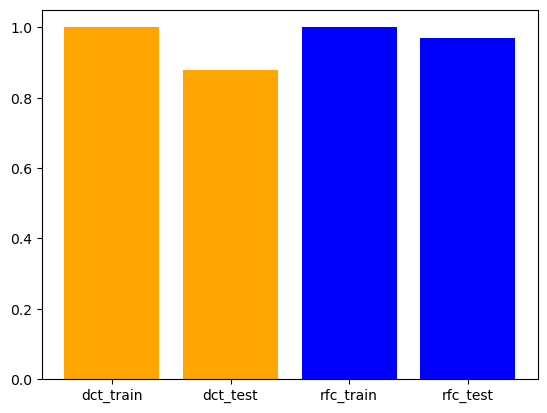

In [10]:
# 랜덤 포레스트 결과를 토대로 비교 그래프 그리기
import matplotlib.pyplot as plt

# x축 정의
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']

# y축 정의
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]

# 막대 그래프 차트 색 정의
colors = ['orange', 'orange', 'blue', 'blue']

# 막대 그래프 설정
plt.bar(acc_list_x, acc_list_y, color=colors)

plt.show()